# Frequency Invariant Load Tracking Test

FreqInvarianceTest is a LisaTest class for automated testing of frequency invariant load tracking. This notebook uses the methods it provides to perform the same analysis as the automated test and plot some results.

The test class runs the same workload at a selection of frequencies, each entry in `t.experiments` represents a run at a different frequency.

## Setup

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import json

from tests.eas.load_tracking import FreqInvarianceTest
from trace import Trace
from trappy.plotter import plot_trace
from trappy.stats.grammar import Parser
from trappy import ILinePlot

In [3]:
import logging
from conf import LisaLogging
LisaLogging.setup()
logging.getLogger('Analysis').setLevel(logging.ERROR)
logging.getLogger('Trace').setLevel(logging.ERROR)

2016-12-13 18:42:57,482 INFO    : root         : Using LISA logging configuration:
2016-12-13 18:42:57,483 INFO    : root         :   /home/brejac01/sources/lisa/logging.conf


## Run test workload

There's currently no way to pass a `TestEnv` or configuration to automated test classes. Instead the target information comes from the `target.config` file (in the root of the LISA source tree), so you'll need to edit that to configure LISA to connect to your target.

In [4]:
t = FreqInvarianceTest()
print t.__doc__


    Frequency invariance test for util_avg signal

    Run workloads providing a known utilization and test that the PELT
    (Per-entity load tracking) util_avg and load_avg signals reflects that
    utilization at various CPU frequencies.
    


To run automated tests from within a notebook we instantiate the test class and call `setUpClass` on it. This is what `nosetests` does internally when running tests from the command line.

In [5]:
t.setUpClass()

2016-12-13 18:42:57,497 INFO    : LisaTest     : Setup tests execution engine...
2016-12-13 18:42:57,498 INFO    : TestEnv      : Using base path: /home/brejac01/sources/lisa
2016-12-13 18:42:57,499 INFO    : TestEnv      : Loading default (file) target configuration
2016-12-13 18:42:57,499 INFO    : TestEnv      : Loading target configuration [/home/brejac01/sources/lisa/target.config]...
2016-12-13 18:42:57,501 INFO    : TestEnv      : Loading custom (inline) test configuration
2016-12-13 18:42:57,502 INFO    : TestEnv      : Devlib modules to load: ['bl', u'cpuidle', 'cgroups', 'cpufreq']
2016-12-13 18:42:57,502 INFO    : TestEnv      : Connecting linux target:
2016-12-13 18:42:57,503 INFO    : TestEnv      :   username : brendan
2016-12-13 18:42:57,503 INFO    : TestEnv      :       host : 192.168.2.2
2016-12-13 18:42:57,504 INFO    : TestEnv      :   password : password
2016-12-13 18:42:57,505 INFO    : TestEnv      : Connection settings:
2016-12-13 18:42:57,505 INFO    : TestEnv 

2016-12-13 18:43:50,424 INFO    : Executor     : Collected FTrace binary trace:
2016-12-13 18:43:50,426 INFO    : Executor     :    <res_dir>/rtapp:freq_450000:fie_10pct/1/trace.dat
2016-12-13 18:43:50,427 INFO    : Executor     : Collected FTrace function profiling:
2016-12-13 18:43:50,429 INFO    : Executor     :    <res_dir>/rtapp:freq_450000:fie_10pct/1/trace_stat.json
2016-12-13 18:43:50,430 INFO    : Executor     : Un-freezing userspace tasks
2016-12-13 18:43:53,237 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-13 18:43:53,239 INFO    : Executor     : 
2016-12-13 18:43:53,240 INFO    : Executor     : ================================================================================
2016-12-13 18:43:53,242 INFO    : Executor     : configuring target for [freq_625000] experiments
2016-12-13 18:43:54,961 INFO    : Executor     : Configuring all CPUs to use [userspace] cpufreq governor
2016-12-13 18:43:55,867 INFO    :

2016-12-13 18:44:19,940 INFO    : Executor     : Collected FTrace binary trace:
2016-12-13 18:44:19,942 INFO    : Executor     :    <res_dir>/rtapp:freq_625000:fie_10pct/1/trace.dat
2016-12-13 18:44:19,943 INFO    : Executor     : Collected FTrace function profiling:
2016-12-13 18:44:19,944 INFO    : Executor     :    <res_dir>/rtapp:freq_625000:fie_10pct/1/trace_stat.json
2016-12-13 18:44:19,946 INFO    : Executor     : Un-freezing userspace tasks
2016-12-13 18:44:22,458 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-13 18:44:22,460 INFO    : Executor     : 
2016-12-13 18:44:22,461 INFO    : Executor     : ================================================================================
2016-12-13 18:44:22,462 INFO    : Executor     : configuring target for [freq_800000] experiments
2016-12-13 18:44:24,181 INFO    : Executor     : Configuring all CPUs to use [userspace] cpufreq governor
2016-12-13 18:44:25,087 INFO    :

2016-12-13 18:44:48,888 INFO    : Executor     : Collected FTrace binary trace:
2016-12-13 18:44:48,890 INFO    : Executor     :    <res_dir>/rtapp:freq_800000:fie_10pct/1/trace.dat
2016-12-13 18:44:48,891 INFO    : Executor     : Collected FTrace function profiling:
2016-12-13 18:44:48,892 INFO    : Executor     :    <res_dir>/rtapp:freq_800000:fie_10pct/1/trace_stat.json
2016-12-13 18:44:48,893 INFO    : Executor     : Un-freezing userspace tasks
2016-12-13 18:44:51,405 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-13 18:44:51,406 INFO    : Executor     : 
2016-12-13 18:44:51,408 INFO    : Executor     : ================================================================================
2016-12-13 18:44:51,409 INFO    : Executor     : configuring target for [freq_950000] experiments
2016-12-13 18:44:53,127 INFO    : Executor     : Configuring all CPUs to use [userspace] cpufreq governor
2016-12-13 18:44:54,033 INFO    :

2016-12-13 18:45:17,664 INFO    : Executor     : Collected FTrace binary trace:
2016-12-13 18:45:17,666 INFO    : Executor     :    <res_dir>/rtapp:freq_950000:fie_10pct/1/trace.dat
2016-12-13 18:45:17,667 INFO    : Executor     : Collected FTrace function profiling:
2016-12-13 18:45:17,669 INFO    : Executor     :    <res_dir>/rtapp:freq_950000:fie_10pct/1/trace_stat.json
2016-12-13 18:45:17,670 INFO    : Executor     : Un-freezing userspace tasks
2016-12-13 18:45:20,182 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-13 18:45:20,183 INFO    : Executor     : 
2016-12-13 18:45:20,184 INFO    : Executor     : ================================================================================
2016-12-13 18:45:20,186 INFO    : Executor     : configuring target for [freq_1100000] experiments
2016-12-13 18:45:21,904 INFO    : Executor     : Configuring all CPUs to use [userspace] cpufreq governor
2016-12-13 18:45:22,810 INFO    

2016-12-13 18:45:46,348 INFO    : Executor     : Collected FTrace binary trace:
2016-12-13 18:45:46,350 INFO    : Executor     :    <res_dir>/rtapp:freq_1100000:fie_10pct/1/trace.dat
2016-12-13 18:45:46,351 INFO    : Executor     : Collected FTrace function profiling:
2016-12-13 18:45:46,352 INFO    : Executor     :    <res_dir>/rtapp:freq_1100000:fie_10pct/1/trace_stat.json
2016-12-13 18:45:46,353 INFO    : Executor     : Un-freezing userspace tasks
2016-12-13 18:45:48,864 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-13 18:45:48,866 INFO    : Executor     : 
2016-12-13 18:45:48,867 INFO    : Executor     : ################################################################################
2016-12-13 18:45:48,868 INFO    : Executor     : Experiments execution completed
2016-12-13 18:45:48,869 INFO    : Executor     : ################################################################################
2016-12-13 18:45:48,870 

## Show variance in util_avg and load_avg
We want to see the same util_avg and load_avg values regardless of frequencies - the bar charts below should have bars all with roughly the same height.

In [9]:
# Get the frequency an experiment was run at
def experiment_freq(exp):
    [cpu] = exp.wload.cpus
    freq = exp.conf['cpufreq']['freqs'][cpu]
    return freq
freqs = [experiment_freq(e) for e in t.executor.experiments]

In [10]:
def plot_signal_against_freq(signal):
    means = [t.get_signal_mean(e, signal) for e in t.executor.experiments]
    limits = (min(means) * 0.99, max(means) * 1.01)
    pd.DataFrame(means, index=freqs, columns=['Mean ' + signal]).plot(kind='bar', ylim=limits)

### Plot of variation of util_avg value with frequency:

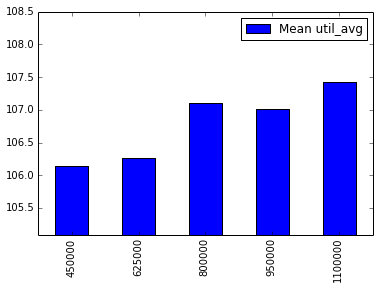

In [11]:
plot_signal_against_freq('util_avg')

### And the same thing for load_avg:

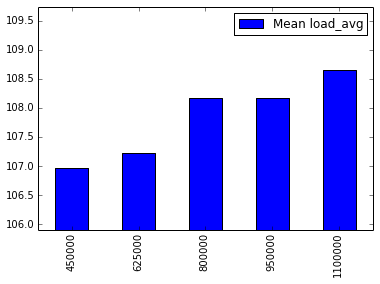

In [12]:
plot_signal_against_freq('load_avg')

## Examine trace from workload execution

Plot task residency and `sched_util` and `sched_load` for the workload task, along with the expected mean value for util_avg. Note that assuming the system was under little load, so that the task was RUNNING whenever it was RUNNABLE, `load_avg` and `util_avg` should be the same. 

Call `examine_experiment` with different experiment indexes to get plots for runs at different frequencies.

In [13]:
signals = ['util_avg', 'load_avg']
def examine_experiment(idx):
    experiment = t.executor.experiments[idx]
    
    [freq] = experiment.conf['cpufreq']['freqs'].values()
    print "Experiment ran at frequency {}".format(freq)
    events = t.te.test_conf["ftrace"]["events"]
    
    # todo add get_trace method
    tasks = experiment.wload.tasks.keys()
    #trace = Trace(t.te.platform, experiment.out_dir, events, tasks)
    print "Trace plot:"
    plot_trace(t.get_trace(experiment).ftrace)
    
    # Get observed signal
    signal_df = t.get_sched_signals(experiment, signals)
    # Get expected average value for util_avg signal
    expected_util_avg_mean = t.get_expected_util_avg(experiment)
    
    print "Scheduler signals:"
    # Plot util avg signal with expected mean value
    util_avg_mean = pd.Series([expected_util_avg_mean], name="expected_util_avg", index=[signal_df.index[0]])
    df = pd.concat([signal_df, util_avg_mean], axis=1).fillna(method="ffill")
    ILinePlot(df, column=signals + ["expected_util_avg"], drawstyle="steps-post").view()

In [14]:
for i , f in enumerate(freqs):
    print "Experiment {}:{:10d}Hz".format(i, f)

Experiment 0:    450000Hz
Experiment 1:    625000Hz
Experiment 2:    800000Hz
Experiment 3:    950000Hz
Experiment 4:   1100000Hz


In [15]:
examine_experiment(0)

Experiment ran at frequency 450000
Trace plot:


Scheduler signals:


""
""
